In [1]:
import numpy as np,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import *
import glob

In [3]:
pretrained_model=VGG16(weights='imagenet')

In [4]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
model_for_cats_dogs=Sequential()
for layer in pretrained_model.layers[:-1]:
    layer.trainable=False
    model_for_cats_dogs.add(layer)
model_for_cats_dogs.add(Dense(1,activation='sigmoid'))

In [6]:
model_for_cats_dogs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [23]:
cats=r"H:\Intellipaat\AI\Assignments\5\cats-dogs\cats\*.jpg"
dogs=r"H:\Intellipaat\AI\Assignments\5\cats-dogs\dogs\*.jpg"

In [24]:
x=[]
y=[]
for image_path in glob.glob(cats):
    input_img=load_img(image_path,target_size=(224,224))
    input_img=np.array(input_img)
    input_img=preprocess_input(input_img)
    x.append(input_img)
    y.append(0)
for image_path in glob.glob(dogs):
    input_img=load_img(image_path,target_size=(224,224))
    input_img=np.array(input_img)
    input_img=preprocess_input(input_img)
    x.append(input_img)
    y.append(1)


In [26]:
x=np.array(x)
x.shape

(2000, 224, 224, 3)

In [27]:
y=np.array(y)
y.shape

(2000,)

In [28]:
model_for_cats_dogs.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [30]:
model_for_cats_dogs.fit(x=x,y=y,validation_split=0.2,epochs=10,shuffle=True)

Epoch 1/10


50/50 [==============================] - 580s 11s/step - loss: 0.1835 - accuracy: 0.9212 - val_loss: 0.0682 - val_accuracy: 0.9725
Epoch 2/10
50/50 [==============================] - 575s 12s/step - loss: 0.0392 - accuracy: 0.9850 - val_loss: 0.0692 - val_accuracy: 0.9725
Epoch 3/10
50/50 [==============================] - 627s 13s/step - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.0802 - val_accuracy: 0.9725
Epoch 4/10
50/50 [==============================] - 567s 11s/step - loss: 0.0159 - accuracy: 0.9975 - val_loss: 0.0749 - val_accuracy: 0.9725
Epoch 5/10
50/50 [==============================] - 593s 12s/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 0.0921 - val_accuracy: 0.9675
Epoch 6/10
50/50 [==============================] - 598s 12s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9750
Epoch 7/10
50/50 [==============================] - 611s 12s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0928 - val_accuracy: 0.9700
Epoc

In [31]:
train_loss=model_for_cats_dogs.history.history['loss']
test_loss=model_for_cats_dogs.history.history['val_loss']
train_acc=model_for_cats_dogs.history.history['accuracy']
test_acc=model_for_cats_dogs.history.history['val_accuracy']

Text(0.5, 1.0, 'Log_loss vs Epochs')

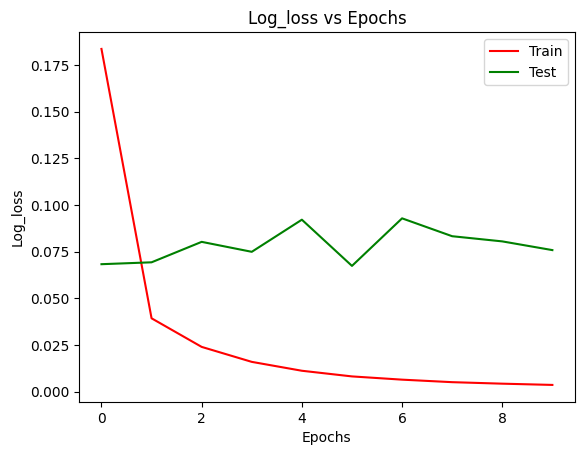

In [32]:
plt.plot(train_loss,color='red',label='Train')
plt.plot(test_loss,color='green',label='Test')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Log_loss')
plt.title('Log_loss vs Epochs')

Text(0.5, 1.0, 'Accuracy vs Epochs')

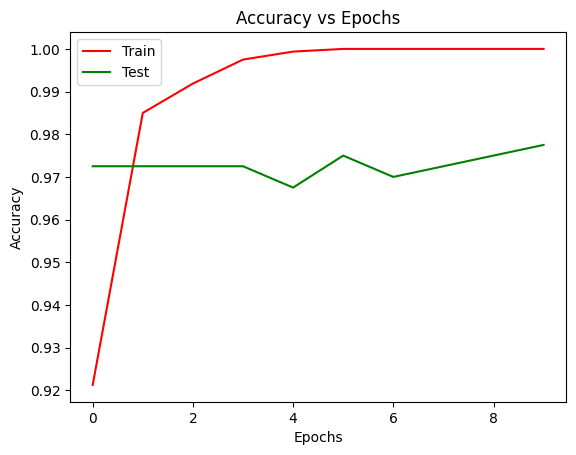

In [33]:
plt.plot(train_acc,color='red',label='Train')
plt.plot(test_acc,color='green',label='Test')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')

In [38]:
cat_test_img=load_img(r"C:\Users\HP\Desktop\cat.jpg")
dog_test_img=load_img(r"C:\Users\HP\Desktop\dog.jpg")

In [39]:
cat_test_img=np.array(cat_test_img)
cat_test_img=cat_test_img.reshape(1,224,224,3)
cat_test_img=preprocess_input(cat_test_img)
cat_preds=model_for_cats_dogs.predict(cat_test_img)
np.argmax(cat_preds)

1/1 [==============================] - 3s 3s/step


0